Raghad Adel Alessa

ragadadel@hotmail.com

+966548831031

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "IMDB-Movie-Data.csv"
# Read and import a CSV data file into Python using Pandas.
data = pd.read_csv(file_path)
Copy_data = pd.read_csv(file_path)

print(data.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [25]:

# In[12]:


# Summary Statistics

# print(data.info())
# print("="*50)
# print(data.describe())


data['Genre'] = data['Genre'].str.split(',').str[0]

Copy_data['Title'] = data['Title']


In [26]:
# Checking for missing values
data = data.copy(deep=True)
print(data.isnull().sum())
# Filling missing values

data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].median(), inplace=True)

data['Metascore'].fillna(data['Metascore'].median(), inplace=True)

print("="*50)
print(data.isnull().sum())



Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64
Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


In [27]:
#Addressing Outliers
print('Before removing outliers', data.shape)

from scipy import stats

z_scores = np.abs(stats.zscore(data['Revenue (Millions)']))
data = data[(z_scores < 3)]

print(data['Revenue (Millions)'])


print('After removing outliers',data.shape)


Before removing outliers (1000, 12)
0      333.130
1      126.460
2      138.120
3      270.320
4      325.020
        ...   
995     47.985
996     17.540
997     58.010
998     47.985
999     19.640
Name: Revenue (Millions), Length: 982, dtype: float64
After removing outliers (982, 12)


In [28]:
# 1. Normalization

print(data[['Runtime (Minutes)']])

from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_max_scaler = MinMaxScaler()
data['Runtime (Minutes)'] = min_max_scaler.fit_transform(data[['Runtime (Minutes)']])


print(data[['Runtime (Minutes)']])

     Runtime (Minutes)
0                  121
1                  124
2                  117
3                  108
4                  123
..                 ...
995                111
996                 94
997                 98
998                 93
999                 87

[982 rows x 1 columns]
     Runtime (Minutes)
0                0.440
1                0.464
2                0.408
3                0.336
4                0.456
..                 ...
995              0.360
996              0.224
997              0.256
998              0.216
999              0.168

[982 rows x 1 columns]


In [29]:
# 2.1 Min-max scaling for Rating

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data[['Rating']])

print(data[['Rating']])

print(scaled_data)

# Update the original data with the scaled values

data['Rating'] = scaled_data


     Rating
0       8.1
1       7.0
2       7.3
3       7.2
4       6.2
..      ...
995     6.2
996     5.5
997     6.2
998     5.6
999     5.3

[982 rows x 1 columns]
[[0.89855072]
 [0.73913043]
 [0.7826087 ]
 [0.76811594]
 [0.62318841]
 [0.60869565]
 [0.92753623]
 [0.65217391]
 [0.75362319]
 [0.73913043]
 [0.8115942 ]
 [0.85507246]
 [0.84057971]
 [0.65217391]
 [0.68115942]
 [0.91304348]
 [0.69565217]
 [0.89855072]
 [0.88405797]
 [0.69565217]
 [0.86956522]
 [0.69565217]
 [0.66666667]
 [0.49275362]
 [0.71014493]
 [0.92753623]
 [0.4057971 ]
 [0.62318841]
 [0.57971014]
 [0.63768116]
 [0.8115942 ]
 [0.75362319]
 [0.88405797]
 [0.53623188]
 [0.97101449]
 [0.82608696]
 [0.72463768]
 [0.75362319]
 [0.63768116]
 [0.8115942 ]
 [0.11594203]
 [0.76811594]
 [0.63768116]
 [0.69565217]
 [0.7826087 ]
 [0.53623188]
 [0.75362319]
 [0.26086957]
 [0.56521739]
 [0.53623188]
 [0.76811594]
 [0.7826087 ]
 [0.76811594]
 [0.79710145]
 [0.73913043]
 [0.8115942 ]
 [0.69565217]
 [0.71014493]
 [0.66666667]
 [0.31

In [30]:
# 2.2 Min-max scaling for Revenue (Millions)

scaled_data = scaler.fit_transform(data[['Revenue (Millions)']])

print(data[['Revenue (Millions)']])

print(scaled_data)

# Update the original data with the scaled values

data['Revenue (Millions)'] = scaled_data



     Revenue (Millions)
0               333.130
1               126.460
2               138.120
3               270.320
4               325.020
..                  ...
995              47.985
996              17.540
997              58.010
998              47.985
999              19.640

[982 rows x 1 columns]
[[9.04482637e-01]
 [3.43352068e-01]
 [3.75010182e-01]
 [7.33946947e-01]
 [8.82463142e-01]
 [1.22532649e-01]
 [4.10143629e-01]
 [1.30284271e-01]
 [2.17479840e-02]
 [2.71537563e-01]
 [6.35388667e-01]
 [4.59585675e-01]
 [6.75382151e-01]
 [7.79234884e-03]
 [1.00000000e+00]
 [1.82237789e-01]
 [4.40281285e-01]
 [1.40343732e-01]
 [2.72867964e-01]
 [1.96030518e-02]
 [1.29510467e-01]
 [1.30284271e-01]
 [4.17284353e-01]
 [2.80035839e-01]
 [1.30284271e-01]
 [1.76481768e-02]
 [2.71510412e-05]
 [3.07023974e-01]
 [1.48380440e-01]
 [1.63747930e-01]
 [2.88887079e-02]
 [4.21737124e-01]
 [9.85637099e-01]
 [7.28733947e-02]
 [5.10412424e-01]
 [6.31533219e-01]
 [2.53536423e-01]
 [1.30284271e-01]
 [2.

In [31]:
# Encoding column 'Title'

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_titles = encoder.fit_transform(data['Title'].values)

data['Title'] = encoded_titles



In [32]:
# Encoding column 'Description'

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_titles = encoder.fit_transform(data['Description'].values)

data['Description'] = encoded_titles



In [33]:
# Encoding column 'Director'

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_titles = encoder.fit_transform(data['Director'].values)

data['Director'] = encoded_titles



In [34]:
# Encoding column 'Actors'

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_titles = encoder.fit_transform(data['Actors'].values)

data['Actors'] = encoded_titles



In [35]:
# Encoding column 'Genre'

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_titles = encoder.fit_transform(data['Genre'].values)

data['Genre'] = encoded_titles



In [36]:
# 3. Heat Map

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

import sklearn   
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline 



# Part 1: Loading and Splitting Data


In [37]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split


# Display the name of the columns:
print('Display the name of the columns:')
print(data.columns)
print()

print('Display the shape of the data:')
print(data.shape)
print()

# Split the data into independent and dependent variables:
X = data.drop(labels=['Rating', 'Year','Genre'], axis=1)


# X = data.drop(labels='Rating', axis=1)
y = data['Rating']


# Split data into training (80%) and testing (20%) sets:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=999)

print('Shape of training set features:')
print(train_X.shape)

print('Shape of testing set features:')
print(test_X.shape)

print('Shape of training set target:')
print(train_y.shape)

print('Shape of testing set target:')
print(test_y.shape)


Display the name of the columns:
Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Display the shape of the data:
(982, 12)

Shape of training set features:
(785, 9)
Shape of testing set features:
(197, 9)
Shape of training set target:
(785,)
Shape of testing set target:
(197,)


# Part 2: Training the Model for lab 8

In [38]:
# 1- Create instance of DecisionTreeClassifier

dt = DecisionTreeClassifier()
print(dt)
print(type(dt))



DecisionTreeClassifier()
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [39]:
train_y.sample(7)

791    0.637681
343    0.710145
555    0.391304
880    0.724638
547    0.666667
159    0.869565
603    0.768116
Name: Rating, dtype: float64

In [40]:
# Discretize the target variable into three categories

# bins = [0.338, 0.577, 0.758, 1]
# labels = ['0', '1', '2']
bins = [0.338, 0.451, 0.577, 0.704]
labels = ['1', '2', '3']

train_y_categorical = pd.cut(train_y, bins, labels=labels)

# Convert the categorical target variable to numerical labels for the DecisionTreeClassifier

encoder = LabelEncoder()
encoded_train_y = encoder.fit_transform(train_y_categorical)



encoded_train_y

In [41]:
dt.fit(train_X, encoded_train_y) 


DecisionTreeClassifier()

[Text(0.6701539522058824, 0.9705882352941176, 'x[8] <= 60.5\ngini = 0.607\nsamples = 785\nvalue = [28, 97, 245, 415]'),
 Text(0.4715579044117647, 0.9117647058823529, 'x[6] <= 185820.5\ngini = 0.672\nsamples = 430\nvalue = [23, 87, 186, 134]'),
 Text(0.29723345588235295, 0.8529411764705882, 'x[8] <= 41.5\ngini = 0.669\nsamples = 329\nvalue = [21, 80, 153, 75]'),
 Text(0.12323529411764705, 0.7941176470588235, 'x[2] <= 944.5\ngini = 0.679\nsamples = 115\nvalue = [14, 46, 42, 13]'),
 Text(0.11852941176470588, 0.7352941176470589, 'x[5] <= 0.276\ngini = 0.682\nsamples = 110\nvalue = [14, 46, 37, 13]'),
 Text(0.047058823529411764, 0.6764705882352942, 'x[3] <= 314.5\ngini = 0.675\nsamples = 41\nvalue = [11, 19, 7, 4]'),
 Text(0.023529411764705882, 0.6176470588235294, 'x[2] <= 395.5\ngini = 0.548\nsamples = 19\nvalue = [1, 12, 3, 3]'),
 Text(0.009411764705882352, 0.5588235294117647, 'x[6] <= 6239.0\ngini = 0.292\nsamples = 12\nvalue = [1, 10, 0, 1]'),
 Text(0.004705882352941176, 0.5, 'gini = 0.

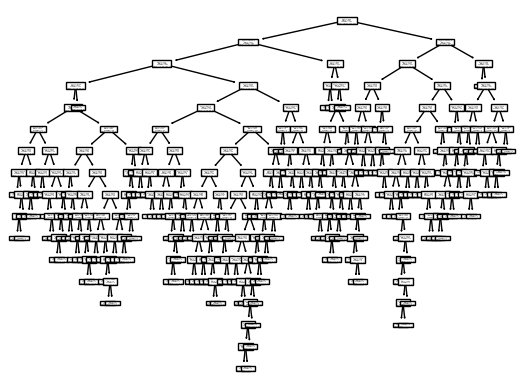

In [42]:
from sklearn import tree
tree.plot_tree(dt)

In [43]:
# Discretize the target variable into three categories
bins = [0.338, 0.451, 0.577, 0.704]
labels = ['1', '2', '3']


test_y_categorical = pd.cut(test_y, bins, labels=labels)

# Convert the categorical target variable to numerical labels for the DecisionTreeClassifier

encoder = LabelEncoder()
encoded_test_y = encoder.fit_transform(test_y_categorical)

In [44]:
predicted_y = dt.predict(test_X) 
result = pd.DataFrame({'Actual': encoded_test_y, 'Y' : predicted_y})

result.sample(10)

,Actual,Y
13,1,0
53,3,3
114,2,1
28,3,3
178,3,2
117,3,3
166,2,3
155,1,2
184,3,3
17,3,3


# Part 3: Evaluating the Model

In [45]:
print ("Accuracy : {:.2f}".format(accuracy_score(encoded_test_y, predicted_y)*100))

Accuracy : 50.76


In [46]:
print("Report :\n", classification_report(encoded_test_y, predicted_y))

Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.19      0.18        21
           2       0.50      0.47      0.49        76
           3       0.62      0.62      0.62        96

    accuracy                           0.51       197
   macro avg       0.32      0.32      0.32       197
weighted avg       0.52      0.51      0.51       197



In [47]:
cm = confusion_matrix(encoded_test_y, predicted_y)
print("Confusion Matrix:\n", cm) 

Confusion Matrix:
 [[ 0  2  1  1]
 [ 1  4 10  6]
 [ 4  7 36 29]
 [ 1 10 25 60]]


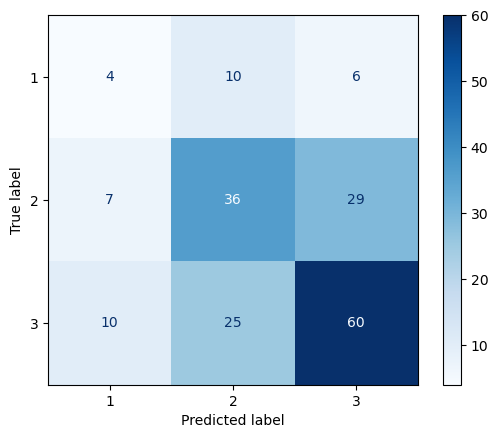

In [48]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(encoded_test_y, predicted_y)[1:4, 1:4]

labels_dict = {data.columns[i]: str(i + 1) for i in range(3)}

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_dict.values())

disp.plot(cmap=plt.cm.Blues)

plt.show()

